# Convert Data into Frames and Face Detection

This notebook is split into 2 parts.  First, I am going to convert a video to still frames using OpenCV.  Next I am going to use OpenCV to put a bounding box around faces 

## Convert Video into Frames

In [1]:
import cv2
import numpy as np

vidObj = cv2.VideoCapture('/kaggle/input/parler/capitol_vids/4wIDySD7tKxo.mp4')

count = 0

while True: 
      
    success, image = vidObj.read() 
    
    if success:
        cv2.imwrite(f"frame{count}.jpg", image) 
    else: 
        break
        
    count += 1

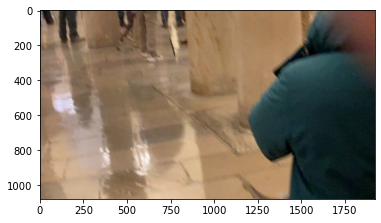

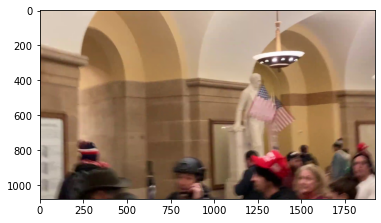

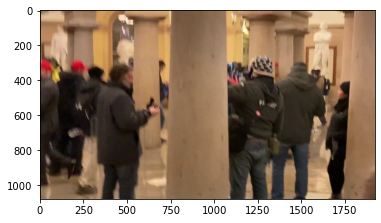

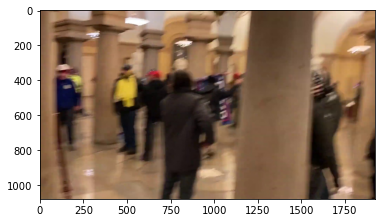

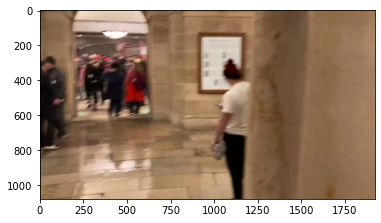

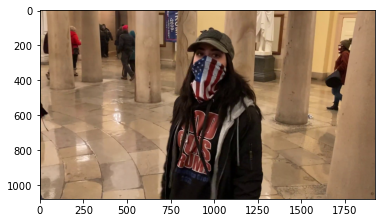

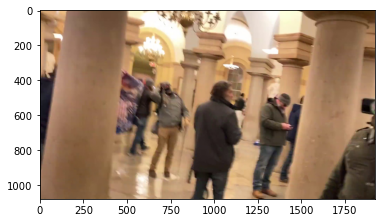

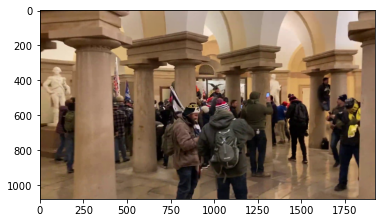

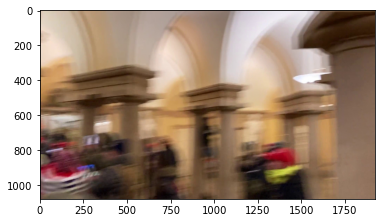

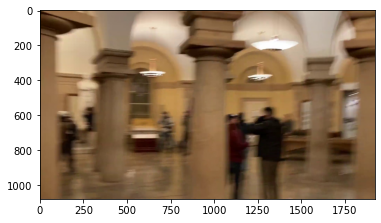

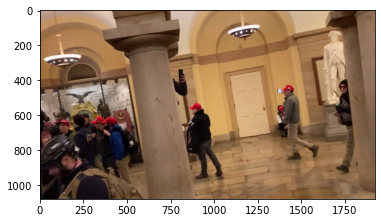

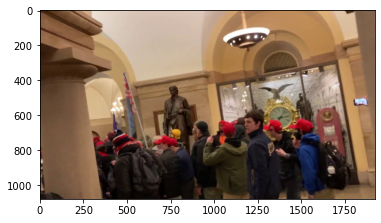

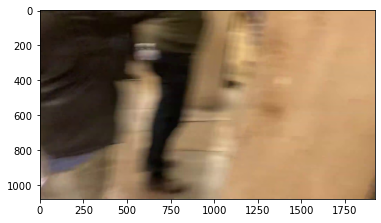

In [2]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

for i in range(0, 1300, 100):
    img = mpimg.imread(f'./frame{i}.jpg')
    imgplot = plt.imshow(img)
    plt.show()

## Detect Faces

I will use this [great notebook](https://www.kaggle.com/serkanpeldek/face-detection-with-opencv) to detect faces 

In [3]:
class FaceDetector():

    def __init__(self,faceCascadePath):
        self.faceCascade=cv2.CascadeClassifier(faceCascadePath)


    def detect(self, image, scaleFactor=1.1,
               minNeighbors=5,
               minSize=(5,5)):
        
        #function return rectangle coordinates of faces for given image
        rects=self.faceCascade.detectMultiScale(image,
                                                scaleFactor=scaleFactor,
                                                minNeighbors=minNeighbors,
                                                minSize=minSize)
        return rects

Download pretrained model from [here](https://raw.githubusercontent.com/opencv/opencv/master/data/haarcascades/haarcascade_frontalface_default.xml)

In [4]:
#Frontal face of haar cascade loaded
frontal_cascade_path="/kaggle/input/casscadeclassifier/haarcascade_frontalface_default.xml"

#Detector object created
fd=FaceDetector(frontal_cascade_path)

In [5]:
my_image=cv2.imread("frame1100.jpg")

In [6]:
def get_my_image():
    return np.copy(my_image)

def show_image(image):
    plt.figure(figsize=(18,15))
    #Before showing image, bgr color order transformed to rgb order
    plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    plt.xticks([])
    plt.yticks([])
    plt.show()

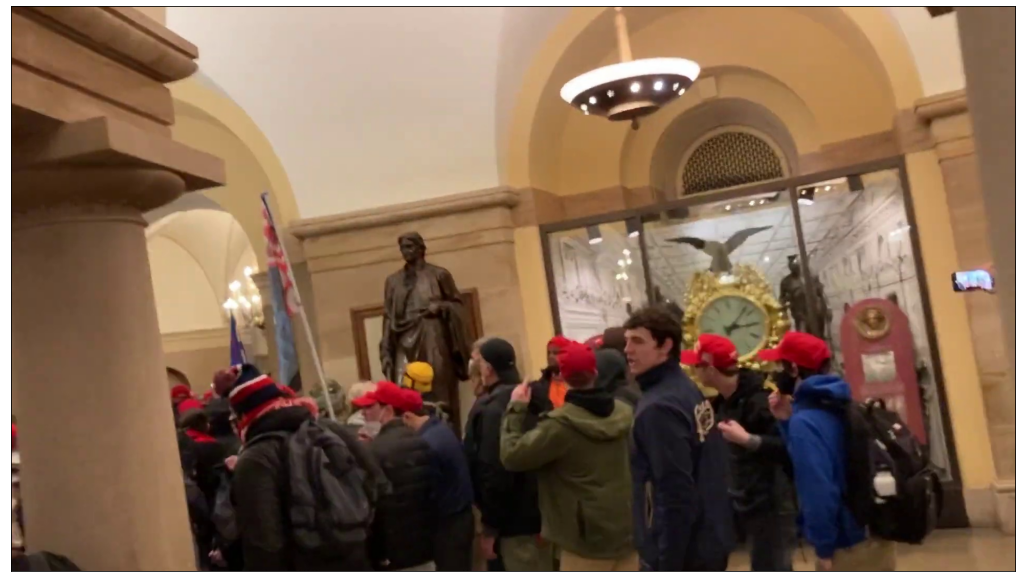

In [7]:
show_image(get_my_image())

In [8]:
def detect_face(image, scaleFactor, minNeighbors, minSize):
    # face will detected in gray image
    image_gray=cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

    faces=fd.detect(image_gray,
                   scaleFactor=scaleFactor,
                   minNeighbors=minNeighbors,
                   minSize=minSize)

    for x, y, w, h in faces:
        #detected faces shown in color image
        cv2.rectangle(image,(x,y),(x+w, y+h),(127, 255,0),3)

    show_image(image)
    

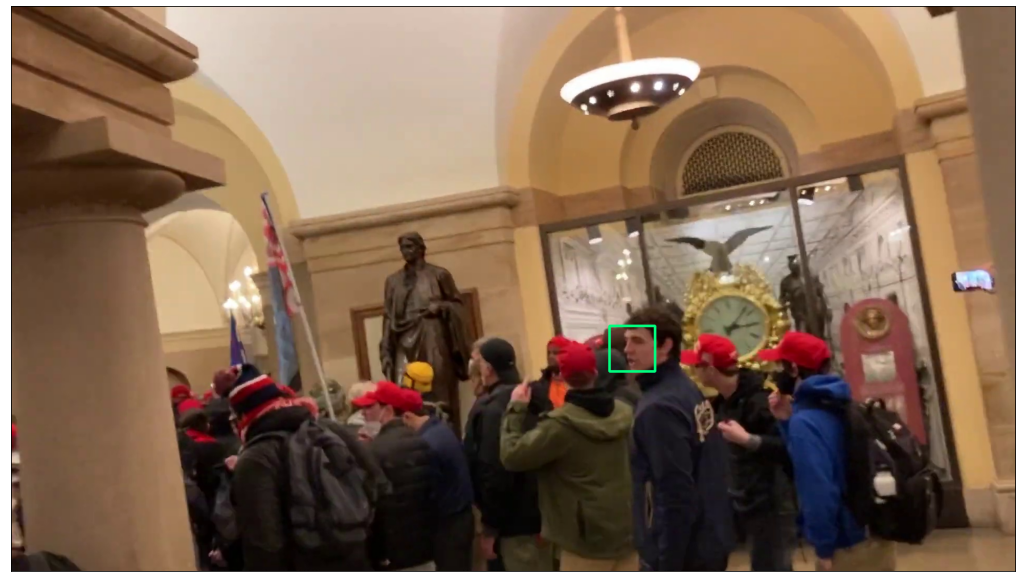

In [9]:
detect_face(image=get_my_image(), 
            scaleFactor=1.9, 
            minNeighbors=3, 
            minSize=(30,30))